## INTRODUCTION

A credit card is a payment card issued to users, which enables the cardholder to pay a
merchant for goods and services based on the cardholder's promise to the card issuer to
pay them for the amounts plus other agreed charges. Credit card approval dataset is
used to analyze and predict the approval of credit cards by using ML algorithms. By using the previous customer
credit_score machine learning model, evaluates customers as valid for loan purposes.
There is an order to issue credit cards that have various applications like (Yu 2020)
usage in banking sectors, financial purpose of individuals, and ease of payments for
merchants and payers. Bank employees easily access good customer
applicants for providing credit cards and loans.

In this we have two Datasets, one is for credit card customers details which has 1548 observation and 17 features, and the second Dataset have approval details.

| Variables | Value |
| --- | --- |
|1 - Ind_ID | numeric|
|2 - Gender|text: male, female|
|3 - Car owner|text: having car or not|
|4 - Property owner|text: having property or not|
|5 - Children|numeric: count of children|
|6 - Annual Income|numeric: Annual income|
|7 - Type income|text: Income Type|
|8 - Education|text: Educational Level|
|9 - Marital status|text: Marital status|
|10 - Birthday count|numeric: Use backward count from current day (0), -1 means yesterday|
|11 - Employed days|numeric: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed|
|12 - Mobile Phone|numeric: Any mobile phone|
|13 - Work Phone|numeric: Any work phone|
|14 - Phone|numeric: Any phone number|
|15 - Email ID|numeric: number of email id's|
|16 - Type occupation|text: occupation|
|17 - Family members|numeric: Family size|
| --- | --- |
|1 - Ind_ID | numeric|
|17 - Label |numeric: Approvals[0] & Rejections[1]|

### OBJECTIVE :
The main objective of credit card approval prediction is predicting whether a credit card application will be approved or rejected based on values of features. It is a supervised machine learning classification task. We will analyse the problem and will apply some machine learning model to see the performance of model whether the model is performing well or not.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# To load the data (.csv file)
data_c = pd.read_csv("Credit_card.csv")

data = data_c.copy()

In [ ]:
data.head()   # To see first 5 rows from the top

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


It is clear that there are missing values in the dataset, as there are NaN in Dataset

In [ ]:
data.tail()   # To see last 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Work_experience_yrs,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [ ]:
data.shape   # To see no.of rows and columns of our dataset

(1548, 18)

There are total 1548 observations and 18 variables in the data set.

In [ ]:
data.info()    # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ind_ID               1548 non-null   int64  
 1   GENDER               1541 non-null   object 
 2   Car_Owner            1548 non-null   object 
 3   Propert_Owner        1548 non-null   object 
 4   CHILDREN             1548 non-null   int64  
 5   Annual_income        1525 non-null   float64
 6   Type_Income          1548 non-null   object 
 7   EDUCATION            1548 non-null   object 
 8   Marital_status       1548 non-null   object 
 9   Housing_type         1548 non-null   object 
 10  Birthday_count       1526 non-null   float64
 11  Work_experience_yrs  1548 non-null   int64  
 12  Mobile_phone         1548 non-null   int64  
 13  Work_Phone           1548 non-null   int64  
 14  Phone                1548 non-null   int64  
 15  EMAIL_ID             1548 non-null   i

We can see we have 10 numerical features which has 8 integer values and 2 are floats values, and 8 categorical features.

In [ ]:
# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Work_experience_yrs,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [ ]:
# Fetching column labels of the Dataset.
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Work_experience_yrs', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

As we can see from above result that there are some columns are in upper case and some are in lower case. So we have to make it proper.

In [ ]:
data.columns = data.columns.str.capitalize()
data.head()

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Birthday_count,Work_experience_yrs,Mobile_phone,Work_phone,Phone,Email_id,Type_occupation,Family_members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
# Let's check for the number of unique values in our data

data.nunique()

Ind_id                 1548
Gender                    2
Car_owner                 2
Propert_owner             2
Children                  6
Annual_income           115
Type_income               4
Education                 5
Marital_status            5
Housing_type              6
Birthday_count         1270
Work_experience_yrs     956
Mobile_phone              1
Work_phone                2
Phone                     2
Email_id                  2
Type_occupation          18
Family_members            7
dtype: int64

There are 1548 observation and the number of unique ID present in the dataset
are also equals to the observation that means there is no duplicate ID presented in the dataset.


---



- Checking for the unique values in variables.  With the help of this we can find if there is any null value is present in dataset or not in any other format like dots[.] etc.

In [ ]:
data['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
data['Car_owner'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data['Propert_owner'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data['Children'].unique()

array([ 0,  1,  2,  4,  3, 14])

In [ ]:
data['Type_income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [ ]:
data['Education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
data['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
data['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
data['Birthday_count'].unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [ ]:
data['Family_members'].unique()

array([ 2,  3,  1,  4,  6,  5, 15])

In [ ]:
data['Type_occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
data['Work_phone'].unique()

array([0, 1])

In [ ]:
data['Email_id'].unique()

array([0, 1])

In [ ]:
data['Phone'].unique()

array([0, 1])

In [ ]:
data['Mobile_phone'].unique()

array([1])

- As we can see here in contact details, 'Work phone', 'Email id' and 'Phone' these columns have 0 and 1 unique values it shown some customer have these details and some don't have. But we can see in 'Mobile phone' column it have only one unique value i.e '1', it shows every customer is having atleast one Mobile number. So we don't need other columns for Exploratory Data Analysis. We will drop all 3 columns except Mobile_phone.

## Data Cleaning

In [ ]:
#  removing unused column / row
data.drop(["Work_phone","Phone","Email_id"], inplace=True, axis=1)

In [ ]:
# renaming column with proper name.
data.rename(columns = {'Employed_days':'Work_experience_yrs'}, inplace = True)

In [ ]:
# replacing positive values with zero as these are current period.
data['Work_experience_yrs'].replace([365243], 0, inplace=True)

In [ ]:
# converting number of days into number of years.
data['Work_experience_yrs'] = (data['Work_experience_yrs']/365).round()

In [ ]:
# it will convert these negative value into positive figures.
data['Work_experience_yrs'] = abs(data['Work_experience_yrs']).astype(int)

In [ ]:
# renaming column with proper name.
data.rename(columns = {'Birthday_count':'Age'}, inplace = True)

In [ ]:
# converting number of days into number of years.
data['Age'] = (data['Age']/365).round()

In [ ]:
# it will convert these negative value into positive figures.
data['Age'] = abs(data['Age'])

In [ ]:
# After converting to number of years.
data[['Age','Work_experience_yrs']]

,Age,Work_experience_yrs
0,51.0,0
1,37.0,2
2,NaN,2
3,37.0,2
4,37.0,2
...,...,...
1543,33.0,6
1544,28.0,3
1545,36.0,7
1546,42.0,2


### Dealing with missing values

In [ ]:
# Checking for the null values field wise

data.isnull().sum()

Ind_id                   0
Gender                   7
Car_owner                0
Propert_owner            0
Children                 0
Annual_income           23
Type_income              0
Education                0
Marital_status           0
Housing_type             0
Age                     22
Work_experience_yrs      0
Mobile_phone             0
Type_occupation        488
Family_members           0
dtype: int64

In the Dataset we have miising values in Gernder=7, Annual income = 23, Birthday count=22, Type occupation=488.

In [ ]:
# checking if one observation has missing values more than 1
Missing_V = data.isnull().sum(axis = 1)
Missing_V = Missing_V[Missing_V > 1]
Missing_V

2       2
3       2
5       2
27      2
65      2
125     2
143     2
205     2
273     2
561     2
689     2
915     2
919     2
991     2
1199    2
1263    2
1285    2
dtype: int64

## Analyzing the amount of missing data


In [ ]:
data_missing = data.isnull() # checking null values again
data_missing

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Total missing values
data_missing.sum()

Ind_id                   0
Gender                   7
Car_owner                0
Propert_owner            0
Children                 0
Annual_income           23
Type_income              0
Education                0
Marital_status           0
Housing_type             0
Age                     22
Work_experience_yrs      0
Mobile_phone             0
Type_occupation        488
Family_members           0
dtype: int64

In [ ]:
# Percentage of missing values
data_missing.mean() * 100

Ind_id                  0.000000
Gender                  0.452196
Car_owner               0.000000
Propert_owner           0.000000
Children                0.000000
Annual_income           1.485788
Type_income             0.000000
Education               0.000000
Marital_status          0.000000
Housing_type            0.000000
Age                     1.421189
Work_experience_yrs     0.000000
Mobile_phone            0.000000
Type_occupation        31.524548
Family_members          0.000000
dtype: float64

<Axes: >

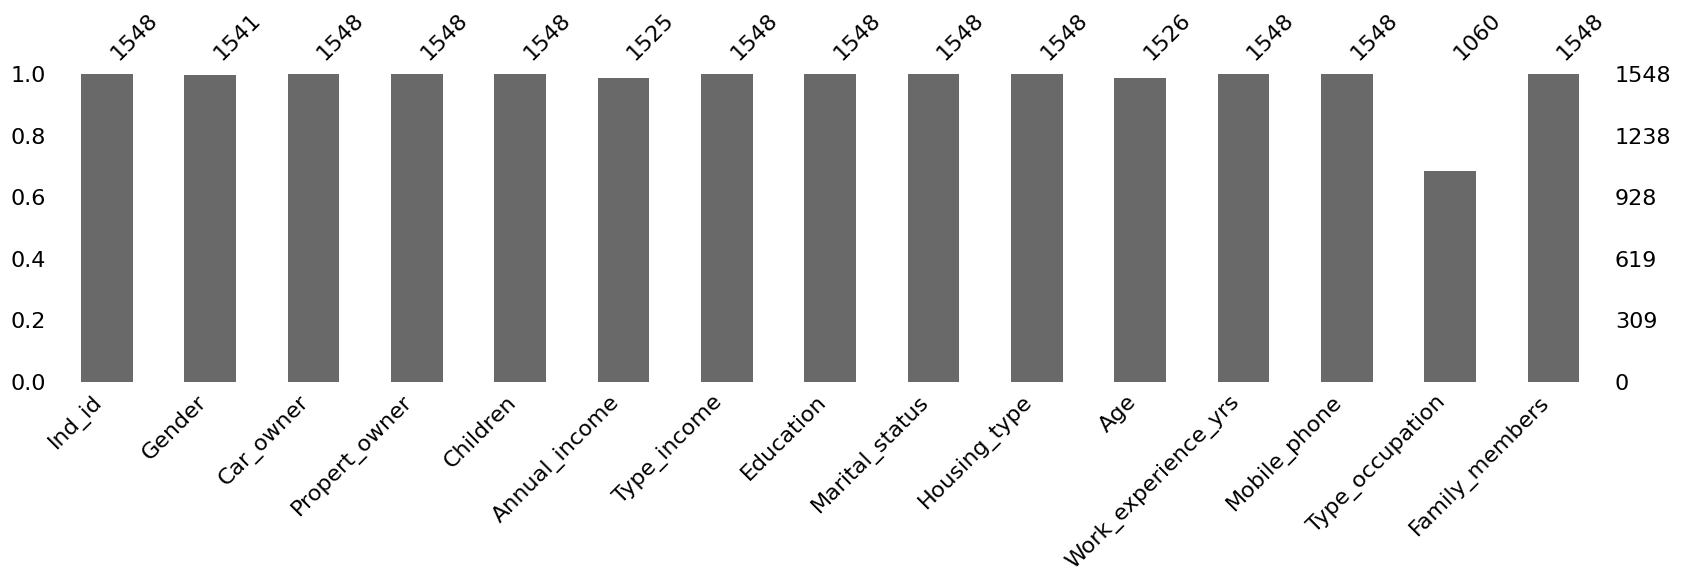

In [ ]:
# msno.bar is a simple visualization of null values by column:
import missingno as msno
msno.bar(data.sample(1548), figsize=(20,4))

There are 4 columns in which we have missing values and their counts.

<Axes: >

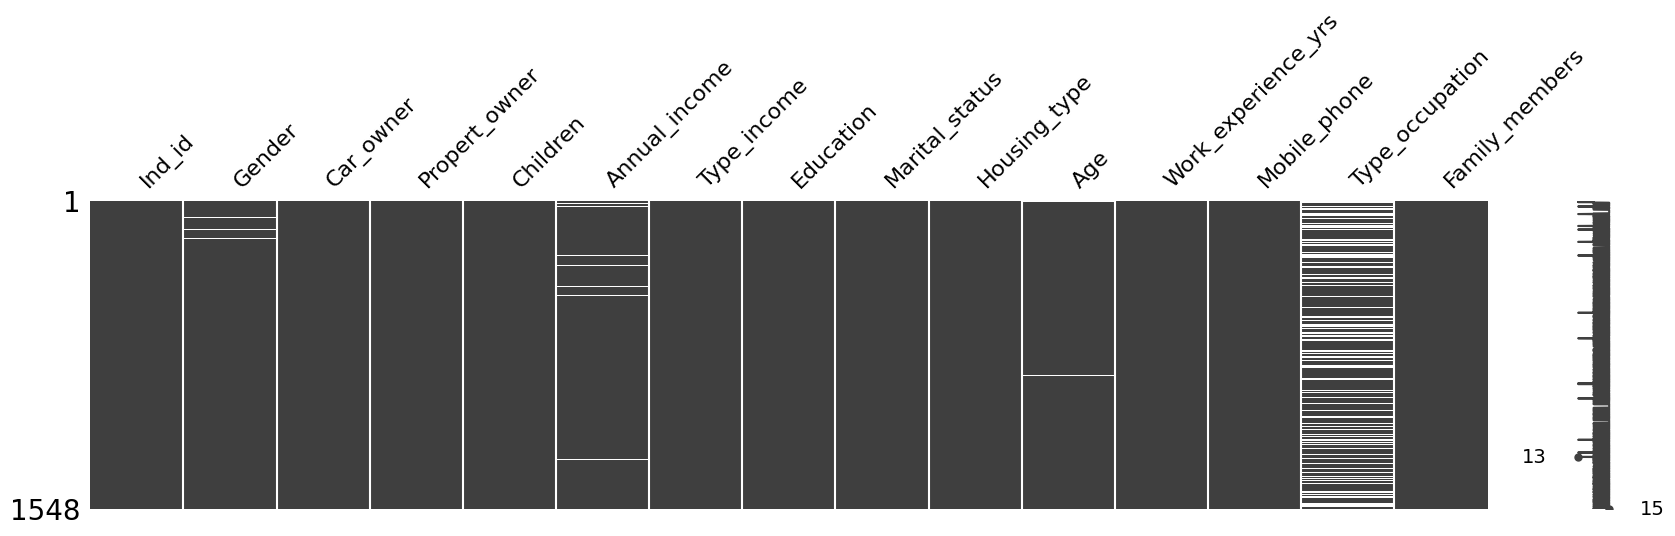

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix((data),figsize=(20,4))

<Axes: >

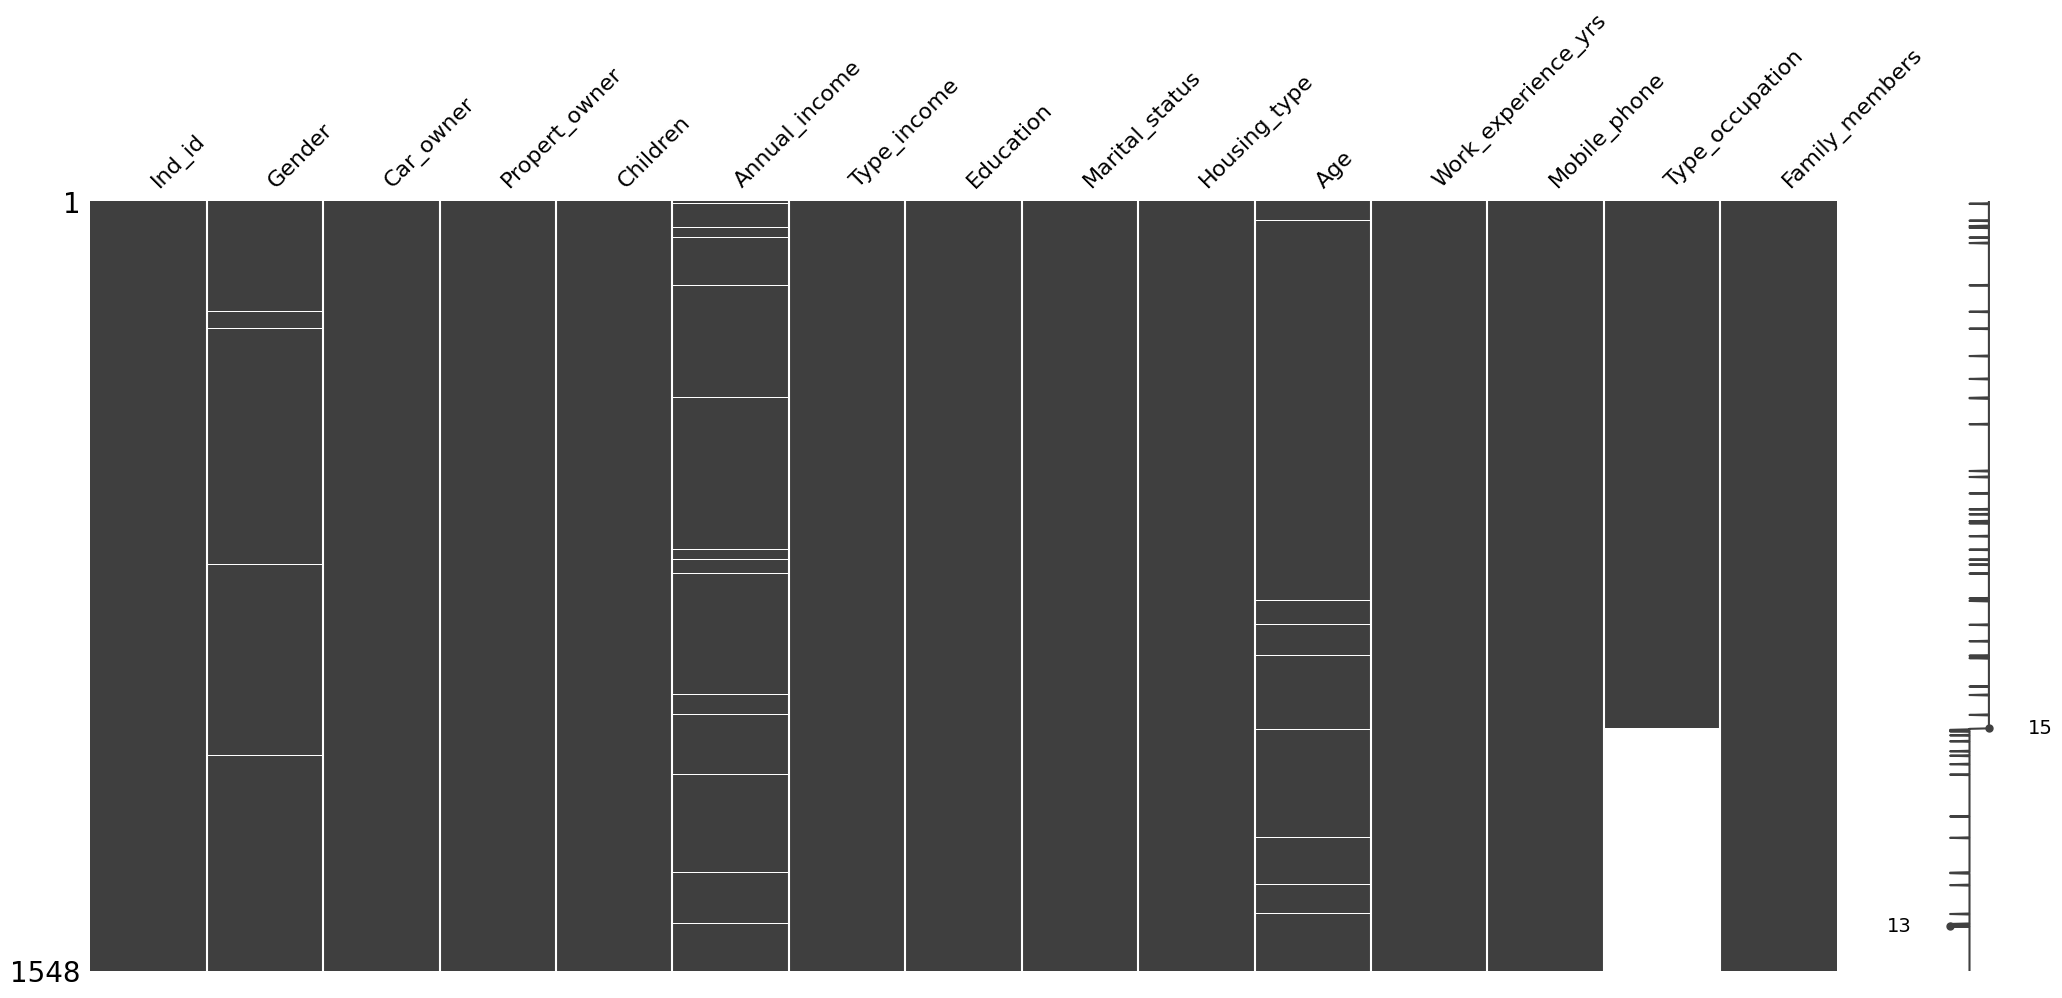

In [ ]:
# sorting values based on Type_occupation
sorted = data.sort_values('Type_occupation')
msno.matrix(sorted)

- As we can see from above visualization, maximum values are missing in Type occupation column. We can impute these missing values by using different imputation techniques.

- Few values are missing in Annual income, Gender and Birthday_count, so we can either remove them or replace by calculating mean or median.

- We can also skip these missing values by doing Pairwise deletion.

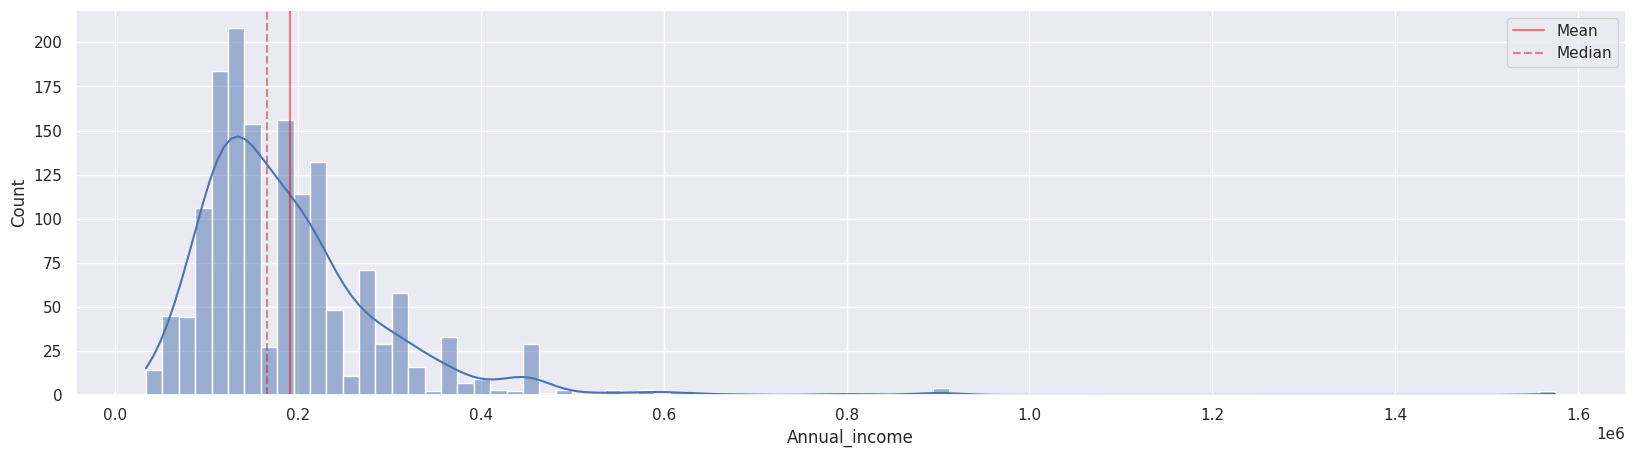

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(data = data['Annual_income'], kde = True) # creating histogram with desnity plot
plt.axvline(x=data.Annual_income.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=data.Annual_income.median(),c='brown',ls='--',alpha=0.5,label='Median') # adding vartical line as median
sns.set(rc={'figure.figsize':(20,5)})
plt.legend() # adding legend

### Before dealing with missing values we have to encode all categorical data

In [ ]:
# Applying Dummy encoding for Gender column :
Data_N = pd.get_dummies(data, columns=[ "Gender" ])

In [ ]:
Data_N.drop(["Gender_M"], inplace=True, axis=1)   #  removing duplicate column
Data_N.rename(columns={'Gender_F':'Gender'},inplace=True)

In [ ]:
Data_N['Gender'].unique()

array([0, 1], dtype=uint8)

In [ ]:
# Applying Label encoding for the column with missing value:

import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Now lets encode the incomplete feature
Data_N['Type_occupation'] = le.fit_transform(Data_N['Type_occupation'].astype(str))

#get nan code for the cabin categorical feature
Occupation_nan_code=le.transform(['nan'])[0]

#Now, retrieve the nan values in the encoded data
Data_N['Type_occupation'].replace(Occupation_nan_code,np.nan,inplace=True)

In [ ]:
Data_N['Type_occupation'].unique()  # As we can see here missing value is not encoded.

array([nan,  3.,  2.,  8., 14.,  0.,  6., 10.,  1.,  4.,  9.,  7., 17.,
       16., 11., 12.,  5., 15., 13.])

In [ ]:
# Label encoding for categorical variable, These columns don't have any missing value.

for val in ["Car_owner", "Propert_owner", "Type_income","Marital_status","Housing_type"]:
    Data_N[val] = LabelEncoder().fit_transform(data[val])

In [ ]:
# Ordinal encoding for Education column..

from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
Data_N[["Education"]] = Or_enc.fit_transform(data[["Education"]])

- We have Dependent variable in separate csv format, so we will upload it and save it in different variable i.e 'Approval_D'. In this we have details of Approval accepted as [0] and Approval rejected as [1]. We will separate the label column from the dataset.

In [ ]:
Approval_D = pd.read_csv("Credit_card_label.csv")

# Renaming column name :
Approval_D.rename(columns={'label':'Approval'},inplace=True)

In [ ]:
Dependent = Approval_D['Approval']   # Y variable created.
Dependent.head()

0    1
1    1
2    1
3    1
4    1
Name: Approval, dtype: int64

In [ ]:
# creating Independent variable (X):

Independent = Data_N[['Ind_id','Gender','Car_owner','Propert_owner','Children','Annual_income','Type_income','Education','Marital_status','Housing_type',
                    'Age','Work_experience_yrs','Mobile_phone','Type_occupation','Family_members']]
Independent.head()

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members
0,5008827,0,1,1,0,180000.0,1,1.0,1,1,51.0,0,1,NaN,2
1,5009744,1,1,0,0,315000.0,0,1.0,1,1,37.0,2,1,NaN,2
2,5009746,1,1,0,0,315000.0,0,1.0,1,1,NaN,2,1,NaN,2
3,5009749,1,1,0,0,NaN,0,1.0,1,1,37.0,2,1,NaN,2
4,5009752,1,1,0,0,315000.0,0,1.0,1,1,37.0,2,1,NaN,2


#### Applying advance imputation KNN and MICE for missing values to see the which technique is best.

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=4ec474ee493ed1af55eff0554223be9216507886299bc39027ef881bcd13a6f6
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=434378f8ac9ab19a8a5f48787047bedbc2e57338cfeb6fcd3a30a4e6dbabf8f0
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/1548 with 1 missing, elapsed time: 0.472
Imputing row 101/1548 with 0 missing, elapsed time: 0.475
Imputing row 201/1548 with 1 missing, elapsed time: 0.476
Imputing row 301/1548 with 0 missing, elapsed time: 0.478
Imputing row 401/1548 with 0 missing, elapsed time: 0.480
Imputing row 501/1548 with 0 missing, elapsed time: 0.482
Imputing row 601/1548 with 1 missing, elapsed time: 0.484
Imputing row 701/1548 with 0 missing, elapsed time: 0.485
Imputing row 801/1548 with 1 missing, elapsed time: 0.487
Imputing row 901/1548 with 0 missing, elapsed time: 0.489
Imputing row 1001/1548 with 1 missing, elapsed time: 0.490
Imputing row 1101/1548 with 1 missing, elapsed time: 0.492
Imputing row 1201/1548 with 1 missing, elapsed time: 0.494
Imputing row 1301/1548 with 1 missing, elapsed time: 0.495
Imputing row 1401/1548 with 1 missing, elapsed time: 0.497
Imputing row 1501/1548 with 0 missing, elapsed time: 0.499


<ipython-input-39-aa1f3837e261>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)


In [ ]:
Independent_knn.head()  # Missing values filled.

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members
0,5008827.0,0.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,51.000000,0.0,1.0,10.777175,2.0
1,5009744.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.925027,2.0
2,5009746.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000001,2.0,1.0,9.924833,2.0
3,5009749.0,1.0,1.0,0.0,0.0,315000.008271,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,3.942762,2.0
4,5009752.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.922913,2.0


In [ ]:
Independent_knn.tail()

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members
1543,5028645.0,1.0,0.0,1.0,0.0,193997.363508,0.0,1.0,1.0,1.0,33.0,6.0,1.0,10.00000,2.0
1544,5023655.0,1.0,0.0,0.0,0.0,225000.000000,0.0,2.0,3.0,1.0,28.0,3.0,1.0,0.00000,1.0
1545,5115992.0,0.0,1.0,1.0,2.0,180000.000000,3.0,1.0,1.0,1.0,36.0,7.0,1.0,10.00000,4.0
1546,5118219.0,0.0,1.0,0.0,0.0,270000.000000,3.0,4.0,0.0,1.0,42.0,2.0,1.0,4.00000,2.0
1547,5053790.0,1.0,1.0,1.0,0.0,225000.000000,3.0,1.0,1.0,1.0,45.0,8.0,1.0,7.93081,2.0


In [ ]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

<ipython-input-42-207ab105cd50>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)


In [ ]:
Independent_MICE.head()

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members
0,5008827.0,0.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,51.000000,0.0,1.0,7.119233,2.0
1,5009744.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,7.164828,2.0
2,5009746.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,44.042572,2.0,1.0,7.164752,2.0
3,5009749.0,1.0,1.0,0.0,0.0,189715.004721,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,7.128033,2.0
4,5009752.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,7.164879,2.0


<Axes: xlabel='Type_occupation', ylabel='Count'>

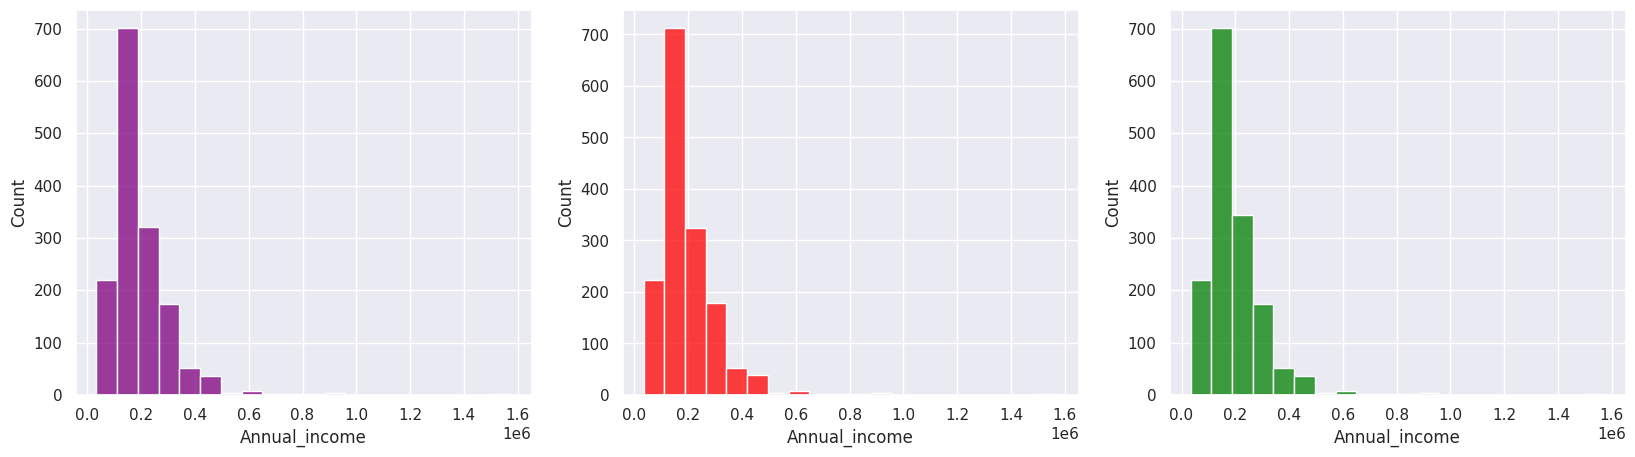

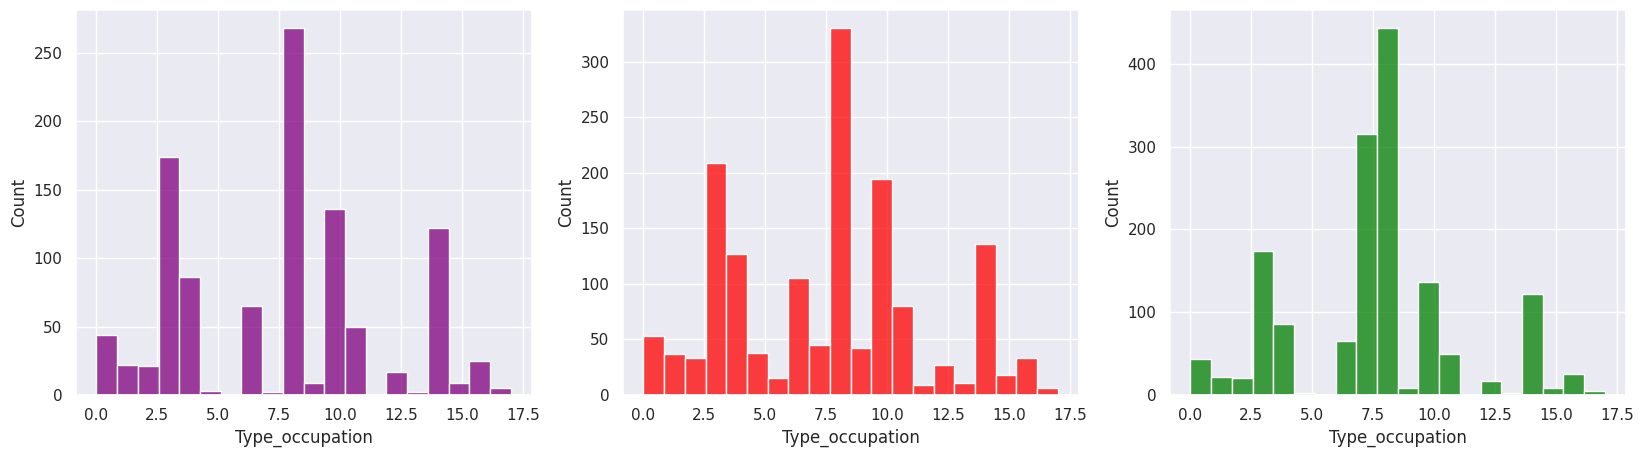

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax =plt.subplots(1,3)
sns.histplot(Data_N['Annual_income'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['Annual_income'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['Annual_income'], color="green", bins=20, ax=ax[2])

fig, ax =plt.subplots(1,3)
sns.histplot(Data_N['Type_occupation'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['Type_occupation'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['Type_occupation'], color="green", bins=20, ax=ax[2])

- From above observation we can say that while using MICE imputation technique some values are still zero. It's not imputing values some cases.

[Text(0.5, 0, 'Type_occupation')]

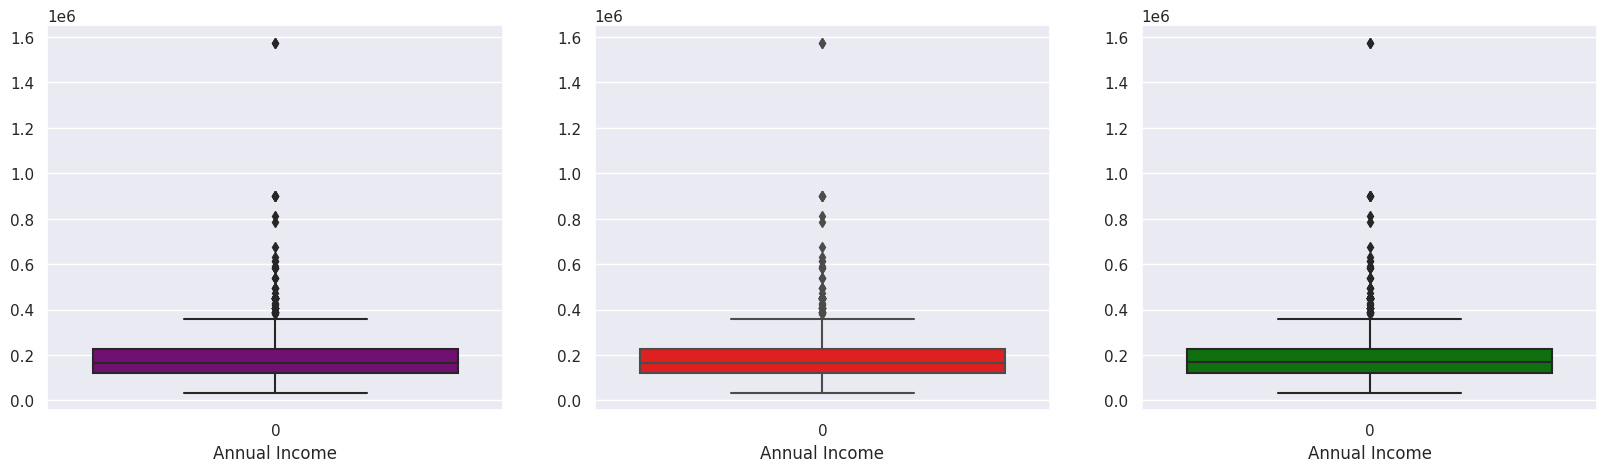

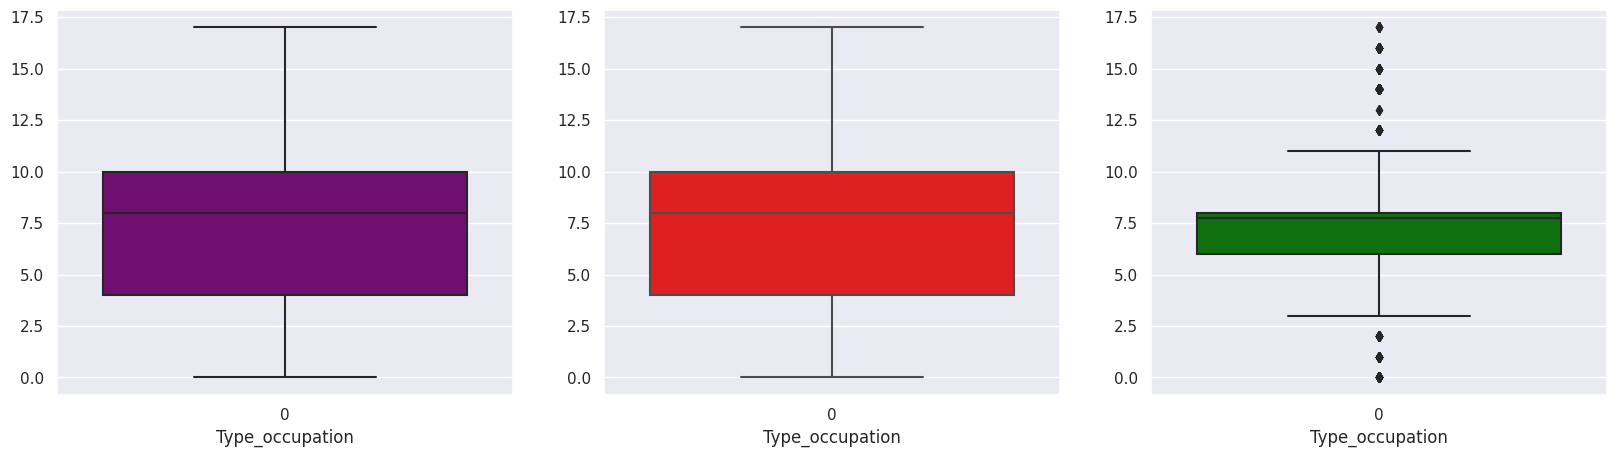

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(Data_N['Annual_income'], color="purple", ax=ax[0]).set(xlabel='Annual Income')
sns.boxplot(Independent_knn['Annual_income'], color="red", ax=ax[1]).set(xlabel='Annual Income')
sns.boxplot(Independent_MICE['Annual_income'], color="green", ax=ax[2]).set(xlabel='Annual Income')
# sns.boxplot.set(xlabel='FICO Score'

fig, ax =plt.subplots(1,3)
sns.boxplot(Data_N['Type_occupation'], color="purple", ax=ax[0]).set(xlabel='Type_occupation')
sns.boxplot(Independent_knn['Type_occupation'], color="red", ax=ax[1]).set(xlabel='Type_occupation')
sns.boxplot(Independent_MICE['Type_occupation'], color="green", ax=ax[2]).set(xlabel='Type_occupation')

- We can see the outliers in Occupation and Annual income column from the MICE technique are more as compared to KNN. So I am going with KNN approach.

In [ ]:
# concatenating independent and dependent variable for visualization
DataC = pd.concat([Independent_knn, Dependent], axis=1)
DataC

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members,Approval
0,5008827.0,0.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,51.000000,0.0,1.0,10.777175,2.0,1
1,5009744.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.925027,2.0,1
2,5009746.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000001,2.0,1.0,9.924833,2.0,1
3,5009749.0,1.0,1.0,0.0,0.0,315000.008271,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,3.942762,2.0,1
4,5009752.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.922913,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,1.0,0.0,1.0,0.0,193997.363508,0.0,1.0,1.0,1.0,33.000000,6.0,1.0,10.000000,2.0,0
1544,5023655.0,1.0,0.0,0.0,0.0,225000.000000,0.0,2.0,3.0,1.0,28.000000,3.0,1.0,0.000000,1.0,0
1545,5115992.0,0.0,1.0,1.0,2.0,180000.000000,3.0,1.0,1.0,1.0,36.000000,7.0,1.0,10.000000,4.0,0
1546,5118219.0,0.0,1.0,0.0,0.0,270000.000000,3.0,4.0,0.0,1.0,42.000000,2.0,1.0,4.000000,2.0,0


### Dealing with outliers

- Using Boxplot to see Outlier

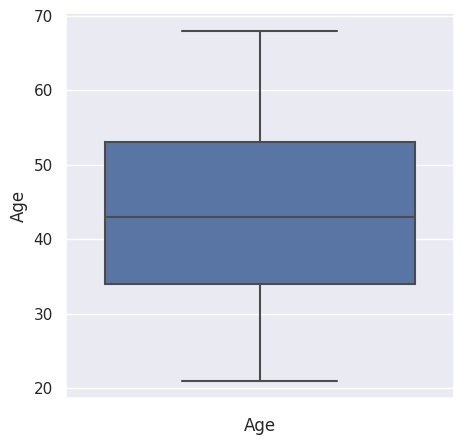

In [ ]:
sns.boxplot(y=DataC['Age']).set(xlabel='Age')
sns.set(rc={'figure.figsize':(5,5)})

- In Age column we dont have any outlier.

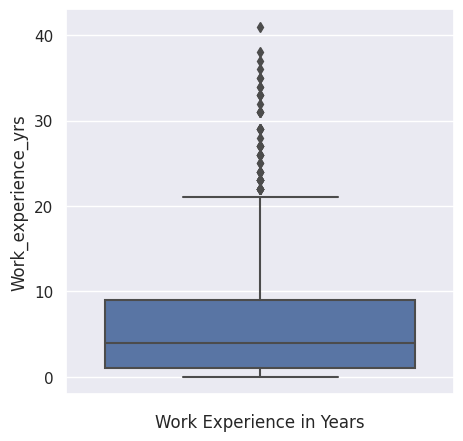

In [ ]:
sns.boxplot(y=DataC['Work_experience_yrs']).set(xlabel='Work Experience in Years')
sns.set(rc={'figure.figsize':(5,5)})

- We can see here also we have outliers.

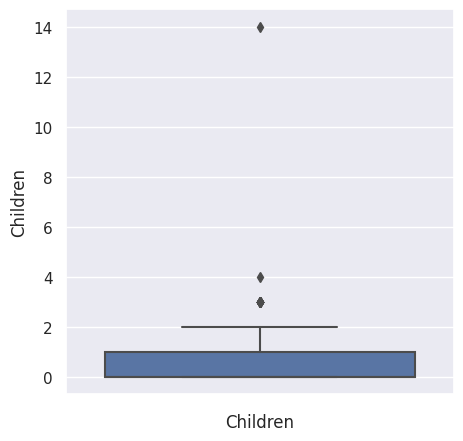

In [ ]:
sns.boxplot(y=DataC['Children']).set(xlabel='Children')
sns.set(rc={'figure.figsize':(5,5)})

- In Children column we have an outlier.

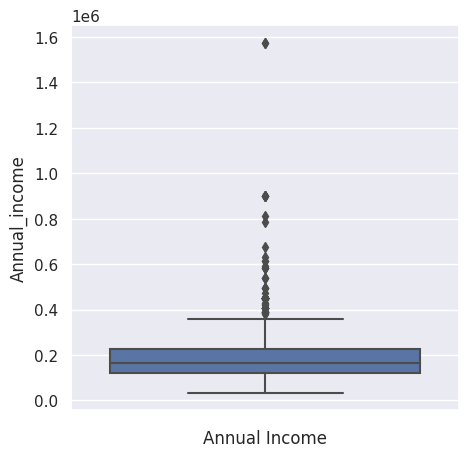

In [ ]:
sns.boxplot(y=DataC['Annual_income']).set(xlabel='Annual Income')
sns.set(rc={'figure.figsize':(5,5)})

- Removing outliers may not be the best approach as it may have approved customers. So I am going with the Data Transformation technique for removing skewness.

### Data Transormation :

In [ ]:
#create log-transformed data
DataC['Annual_income'] = np.log(DataC['Annual_income'])


It is moderately skewed : 0.2013525985604995
Mean Value :  12.037718013027728
Median Value :  12.022750588402635


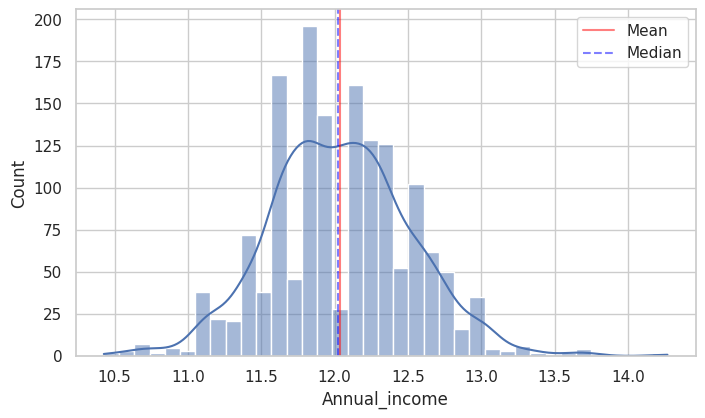

In [ ]:
#creating histogram
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as collections
sns.set(style='whitegrid')
sns.histplot(data = DataC['Annual_income'], kde = True)
plt.axvline(x=DataC.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=DataC.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
print("It is moderately skewed :", DataC['Annual_income'].skew())
print("Mean Value : ",DataC['Annual_income'].mean())
print("Median Value : ",DataC['Annual_income'].median())
sns.set(rc={'figure.figsize':(8,4.5)})

- After applying Data Transformation the skewness has been reduced.

### Data Visualization

### Distribution of continuous variable

- **Univariate Analysis**

In [ ]:
# Creating categories in Age for Data Visualization purpose.

Age_category = pd.cut(DataC['Age'], bins=[0,10,18,60,99],labels=['Child','Adolescent','Adult','Elderly'])

<Figure size 400x600 with 0 Axes>

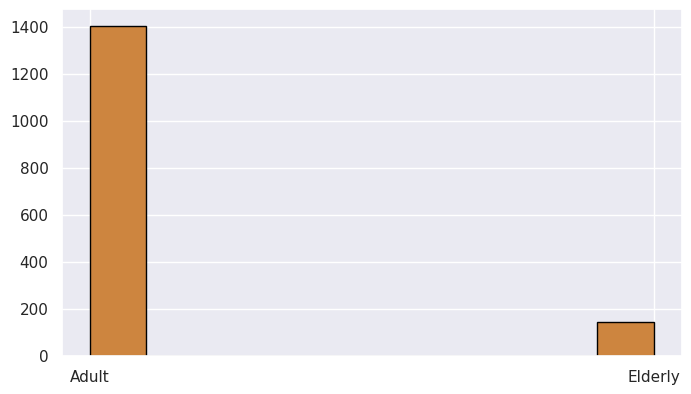

<Figure size 400x600 with 0 Axes>

In [ ]:
plt.hist(Age_category, facecolor = 'Peru', edgecolor = 'black')
plt.figure(figsize=(4,6))

- Here we can say that Adults are more applied for credit cards as compared to Elderly people. It indicates that the majority of applicants are younger individuals

In [ ]:
## Converting Approval Approved to 0 and Approval Rejected to 1 :
Credit_card_label = Approval_D.copy()

Credit_card_label['Approval'] = Credit_card_label.Approval.map({0:'Accepted', 1:'Rejected'})

In [ ]:
# Data_EDA.to_csv('credit_card.csv')
# Credit_card_label.to_csv('credit_card_label.csv')

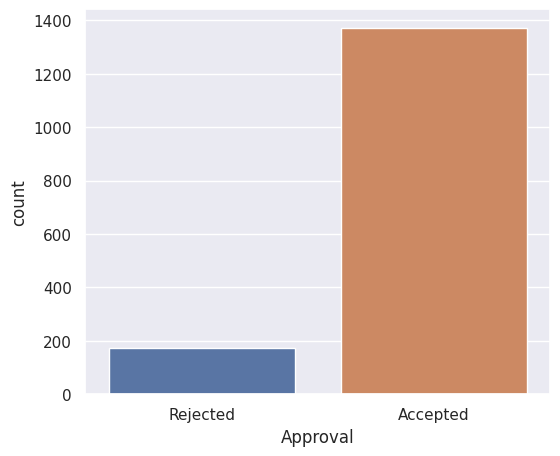

In [ ]:
sns.countplot(data = Credit_card_label, x = 'Approval')
sns.set(rc={'figure.figsize':(5,5)})

- Here we can say Accepted approvals are more than Rejctions. A high approval rate suggests that the credit card company is open to granting credit to a wide range of applicants, including those with different credit profiles.

In [ ]:
# ## Converting numeric values to categorical fro EDA purpose :
Data_EDA = DataC.copy()
Data_EDA['Gender'] = Data_EDA.Gender.map({0:'male', 1:'female'})
Data_EDA['Car_owner'] = Data_EDA.Car_owner.map({0:'No', 1:'Yes'})
Data_EDA['Propert_owner'] = Data_EDA.Propert_owner.map({0:'No', 1:'Yes'})
Data_EDA['Marital_status'] = Data_EDA.Marital_status.map({0:'Civil marriage', 1:'Married', 2:'Separated', 3:'Single / not married', 4:'Widow'})
Data_EDA['Housing_type'] = Data_EDA.Housing_type.map({0:'Co-op apartment', 1:'House / apartment', 2:'Municipal apartment', 3:'Office apartment', 4:'Rented apartment', 5:'With parents'})
Data_EDA['Type_income'] = Data_EDA.Type_income.map({0:'Commercial associate', 1:'Pensioner', 2:'State servant', 3:'Working'})
Data_EDA['Education'] = Data_EDA.Education.map({0:'Academic degree', 1:'Higher education', 2:'Incomplete higher', 3:'Lower secondary', 4:'Secondary / secondary special'})
Data_EDA['Type_occupation'] = Data_EDA.Type_occupation.map({0:'Accountants', 1:'Cleaning staff', 2:'Cooking staff', 3:'Core staff', 4:'Drivers',
                                                            5:'HR staff', 6:'High skill tech staff', 7:'IT staff', 8:'Laborers', 9:'Low-skill Laborers',
                                                            10:'Managers', 11:'Medicine staff', 12:'Private service staff', 13:'Realty agents', 14:'Sales staff',
                                                            15:'Secretaries', 16:'Security staff', 17:'Waiters/barmen staff'})

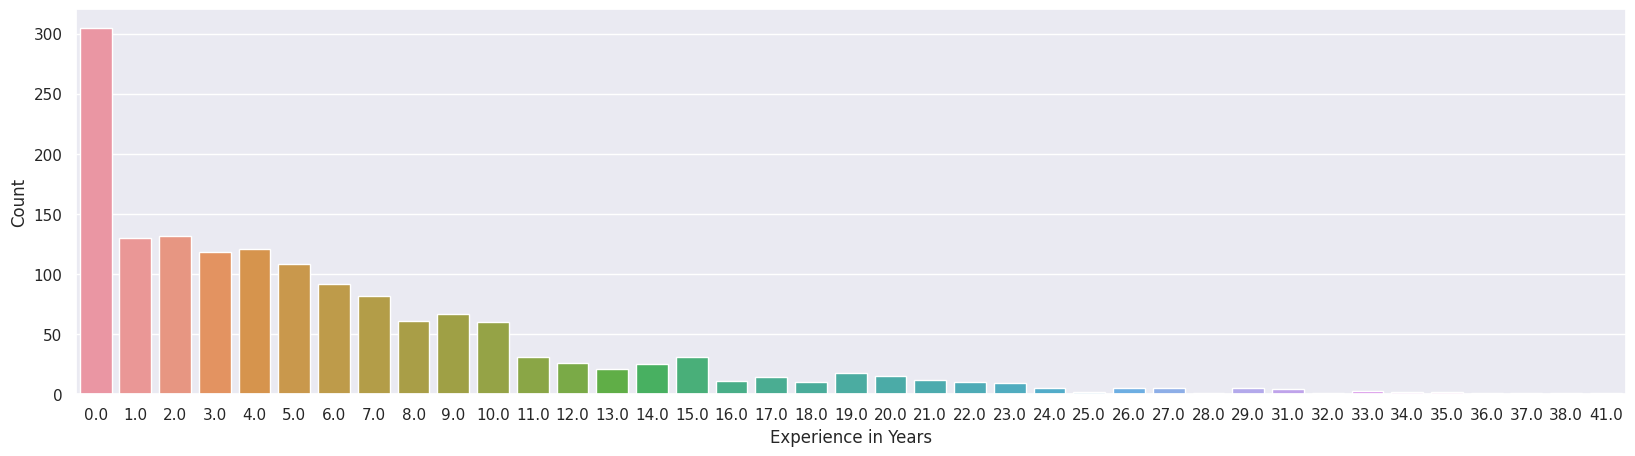

In [ ]:
sns.countplot(x="Work_experience_yrs", data=DataC)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel("Experience in Years")
plt.ylabel("Count")
plt.show()

- More people with 0 years of experience applied for credit card. It may indicate that the applicants are students or dependents who rely on others for financial support. Students often apply for credit cards to establish credit history or for convenience. Dependents, such as spouses or children, may apply for credit cards based on their household income or joint accounts. Some applicants may be currently unemployed and have no regular source of income. They might still apply for a credit card in the hopes of securing credit for immediate needs or to bridge a temporary financial gap.

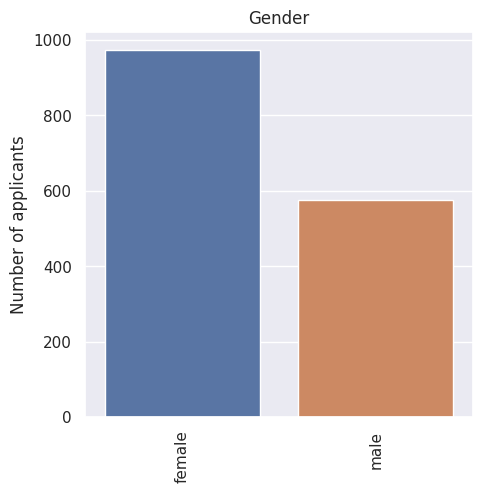

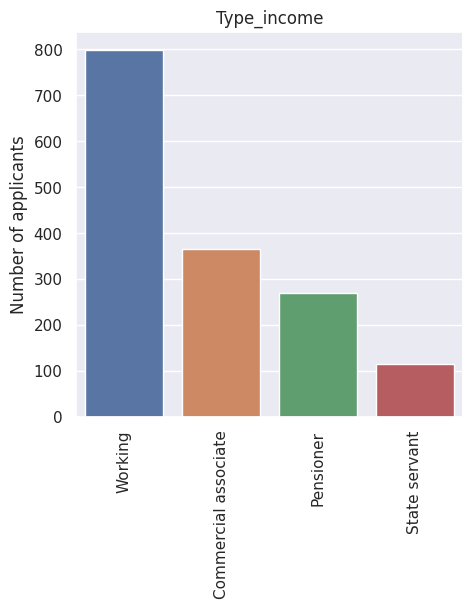

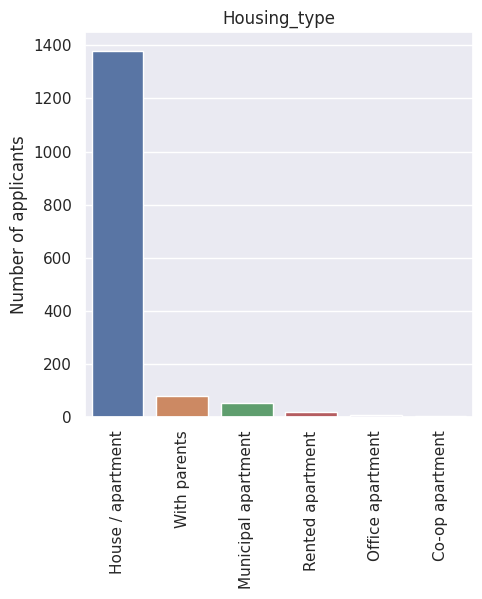

In [ ]:
# Creating a dataframe containing categorical features
Visual_G = Data_EDA[['Gender', 'Type_income', 'Housing_type']]
for i in Visual_G.columns:
    Visual_N = Visual_G[i].value_counts()
    title = Visual_N.name
    Visual_N.name = "Number of applicants"
    chart = sns.barplot(x=Visual_N.index, y=Visual_N)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    chart.y ="Number of applicants"
    plt.title(title)
    sns.set(rc={'figure.figsize':(5,5)})
    plt.show()

### From the above graphs we can observe:

* More no.of Female applied for credit card as compared to Male candidates.
* More no.of Working people applied for credit.
* People who owned houses applied more for credit.

- **Bi-variate Analysis**

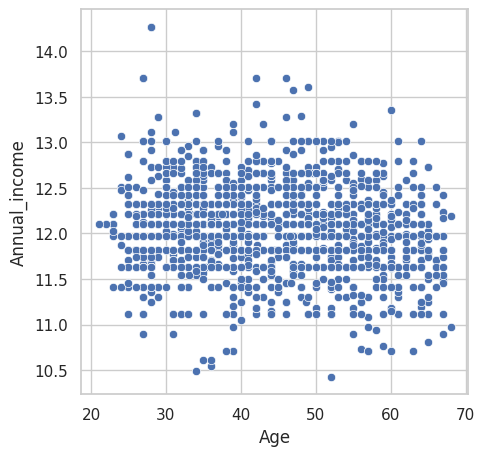

In [ ]:
import seaborn   # visualizing correlation between Age and Annual income with the help of scatterplot.

seaborn.set(style='whitegrid')
fmri = seaborn.load_dataset("fmri")

seaborn.scatterplot(x="Age",
                    y="Annual_income",
                    data=DataC)
seaborn.set(rc={'figure.figsize':(8,5)})

- We can see below with the help of corr() that there is a negative correlation between  Age and Annual income. It indicates a weak negative or inverse relationship between the variables. We can say that as the age of a person increases then the annual income decreases in consistent and propotional manner.

#### We look into the data and try to find out which features matter most to the target variable, i.e. Approval. So here have a correlation graph for the same.

<Axes: >

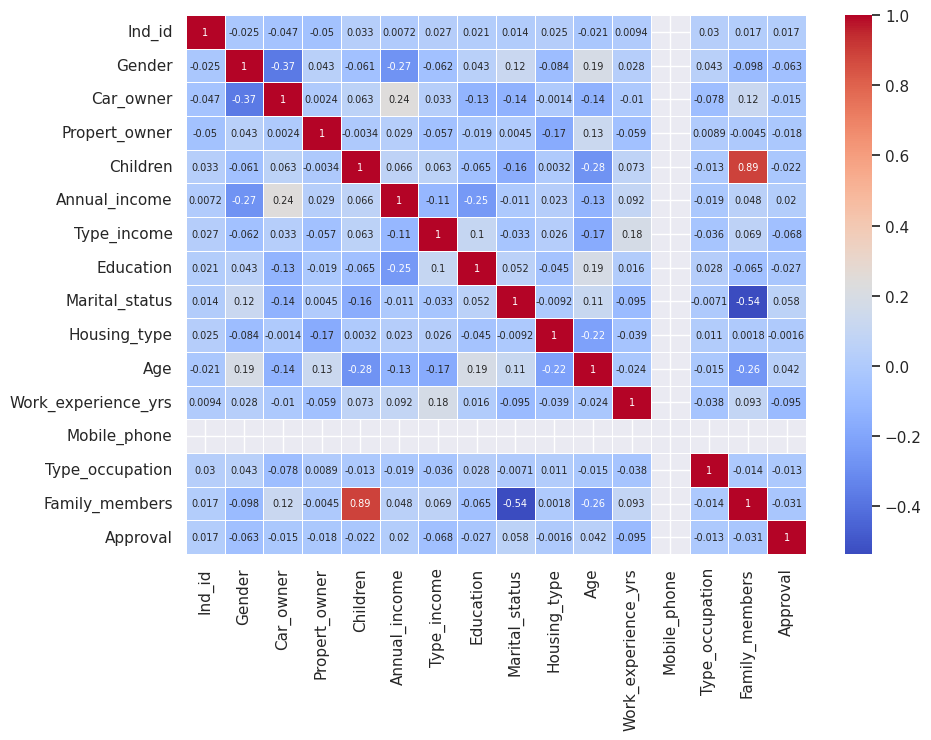

In [ ]:
# Correlation heatmap plot created.
plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
cMatrix = DataC.corr()
fig, ax = plt.pyplot.subplots (figsize=(10, 7))
sns.heatmap(cMatrix, annot = True, cmap = 'coolwarm', linewidths=.5, annot_kws={'size': 7})

- Variables such as Marsital status, Annual_income and Age are having weak correlation and Children & Family members are having strong positive correlation. Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
Some variables are having strong negative correlations, and some have no correlation and whose correlation value is near 0 (zero).


### Examinig Categorical-Continuous data using box plot

In [ ]:
DataC

,Ind_id,Gender,Car_owner,Propert_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Age,Work_experience_yrs,Mobile_phone,Type_occupation,Family_members,Approval
0,5008827.0,0.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,51.000000,0.0,1.0,10.777175,2.0,1
1,5009744.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.925027,2.0,1
2,5009746.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000001,2.0,1.0,9.924833,2.0,1
3,5009749.0,1.0,1.0,0.0,0.0,315000.008271,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,3.942762,2.0,1
4,5009752.0,1.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,37.000000,2.0,1.0,9.922913,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,1.0,0.0,1.0,0.0,193997.363508,0.0,1.0,1.0,1.0,33.000000,6.0,1.0,10.000000,2.0,0
1544,5023655.0,1.0,0.0,0.0,0.0,225000.000000,0.0,2.0,3.0,1.0,28.000000,3.0,1.0,0.000000,1.0,0
1545,5115992.0,0.0,1.0,1.0,2.0,180000.000000,3.0,1.0,1.0,1.0,36.000000,7.0,1.0,10.000000,4.0,0
1546,5118219.0,0.0,1.0,0.0,0.0,270000.000000,3.0,4.0,0.0,1.0,42.000000,2.0,1.0,4.000000,2.0,0


In [ ]:
## Converting Approval Approved to 0 and Approval Rejected to 1 :
Data_EDA['Approval'] = Data_EDA.Approval.map({0:'Accepted', 1:'Rejected'})

In [58]:
# creating box plot using notched = true and keeping all points
import plotly.graph_objects as go
fig = go.Figure(px.box(Data_EDA, x="Annual_income", y="Approval", color="Approval", notched=True, points="all", width=800, height=450,
            labels={"Annual_income": "Annual Income", "Approval": "Approvals"}))
fig.show(rendere = "chrome")

In [59]:
import plotly.io as pio
pio.write_html(fig, file='Approval_based_on_Annual_Income.html',auto_open=True)

- From above analysis we can say that there are more no. of people having Annual income of between 100k to 200k are approved for credit card. Accepted approval is right skewed and Rejected approval is left skewed.

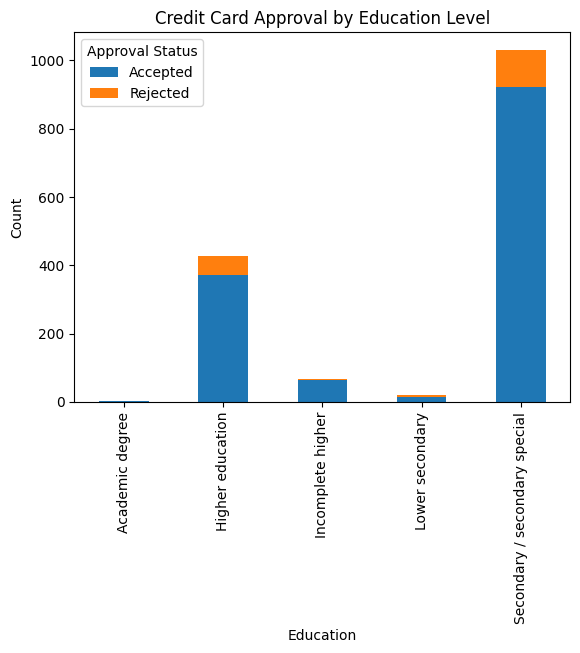

In [61]:
education_counts = Data_EDA.groupby("Education")["Approval"].value_counts().unstack().fillna(0)

# Plotting a bar chart
import matplotlib.pyplot as plt
education_counts.plot(kind="bar", stacked=True)
plt.title("Credit Card Approval by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title="Approval Status")
plt.show()

From the above observation, we can say that the people with having Secondary Special educational level are pretty much more as compared to others in accepted approvals. Vey less number of peoples are rejected for credit card.
It could indicate that a significant portion of individuals pursuing secondary education have applied for credit cards. Many students in secondary education may apply for credit cards to establish credit history, meet their financial needs, or gain financial independence.

In [63]:
# creating box plot using notched = true and keeping all points for Exploratory Data Analysis purpose.
import plotly.graph_objects as go
fig = go.Figure(px.box(Data_EDA, x="Education", y="Annual_income", color="Education", notched=True, points="all", width=800, height=350,
            labels={"Education": "Educational Level", "Annual_income": "Annual Income"}))
fig.show(rendere = "chrome")

- Here we can see people with Higher education and secondary special are having good level of Annual income as compared to the people having Academic degree.
Higher educational levels are typically associated with professions that require advanced skills and knowledge. These professions may be in higher demand, leading to increased competition and higher salaries.

In [64]:
import plotly.io as pio
pio.write_html(fig, file='Annual Income based on Education.html',auto_open=True)

## Using Classification approach : target variable is categorical in nature.

In [ ]:
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


In [ ]:
# Creating X and y variable
X=DataC.iloc[:,:-1]
y=DataC.iloc[:,-1]

## **Implementing KNN algorithm**

In [ ]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Independent_knn, Dependent, test_size=0.30, random_state=16)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[402  14]
 [ 42   7]]
0.8795698924731182


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[402  14]
 [ 42   7]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       416
           1       0.33      0.14      0.20        49

    accuracy                           0.88       465
   macro avg       0.62      0.55      0.57       465
weighted avg       0.85      0.88      0.86       465



KNN's accuracy is better when we perform in depth EDA.


## **Cross Validation**
Cross Validation is a  tool to evaluate a model for accuracy in classification.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
#Implementing cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []


In [ ]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.43548387096774194, 0.967741935483871, 0.9354838709677419, 0.9449838187702265, 0.9514563106796117]
Avg accuracy : 0.8470299613738387


- K-fold cross validation is also performing well.

### **Decision Tree**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=102) # 70% training and 30% test

In [ ]:
# Creating Decision Tree classifer object without Entropy :

classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[360  51]
 [ 34  20]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       411
           1       0.28      0.37      0.32        54

    accuracy                           0.82       465
   macro avg       0.60      0.62      0.61       465
weighted avg       0.84      0.82      0.83       465



In [ ]:
# Creating Decision Tree classifer object with Entropy :

classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.8947 
Decision tree testing set accuracy: 0.8860 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# # print classification report
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[411   0]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       411
           1       1.00      0.02      0.04        54

    accuracy                           0.89       465
   macro avg       0.94      0.51      0.49       465
weighted avg       0.90      0.89      0.83       465



### **XGBOOST**

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       411
           1       0.78      0.33      0.47        54

    accuracy                           0.91       465
   macro avg       0.85      0.66      0.71       465
weighted avg       0.90      0.91      0.90       465

[[406   5]
 [ 36  18]]


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.18%


### **GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(model)

GradientBoostingClassifier()


In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       411
           1       0.62      0.15      0.24        54

    accuracy                           0.89       465
   macro avg       0.76      0.57      0.59       465
weighted avg       0.87      0.89      0.86       465

[[406   5]
 [ 46   8]]


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.03%


### **RandomForest**

In [ ]:
# Here, we are using RandomForestClassifier as a Machine Learning model to fit the data.

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(); print(model)


RandomForestClassifier()


In [ ]:
# Now we have predicted the output by passing X_test and also stored real target in expected_y.

expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
# Here we have printed classification report and confusion matrix for the classifier.

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       411
           1       0.89      0.31      0.47        54

    accuracy                           0.92       465
   macro avg       0.91      0.65      0.71       465
weighted avg       0.91      0.92      0.90       465

[[409   2]
 [ 37  17]]


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.61%


| Classification Approach         | Accuracy |
| --- | --- |
|1 - KNN Algorithm | 88% |
|2 - Cross Validation | 84% |
|3 - Decision Tree | 89% |
|4 - XGBOOST | 91.18% |
|5 - Gradientboosting | 89.03% |
|6 - RandomForest | 91.61% |


### **Conclusion**
In this, we have mentioned various machine learning methods to predict whether a credit card will be approved for an individual or not. We have used KNN algorithm, k-fold corss validation, Decision Tree, Xgboost, Gradientboosting and RandomForest. We can say that these algorithm are performing well by giving good accuracy score. It can help us to make better decisions to avoid fraud and losses. We applied data pre-processing techniques as good amount of data pre-processing contributes effectively to developing better performance of traditional machine learning models. During Exploratory Data Analysis, we plotted a lot of graphs and charts to study the dataset deeply so that we can get a better understanding of the dataset. This was done so that we can decide which models to apply which can perform well on this dataset and can correctly predict whether to approve a credit card or not. This prediction system can be helpful to various banks as it makes their task easier and increases efficiency as compared to the manual system which is currently used by many banks and this system is cost effective.